# File and Data Field Descriptions
* train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
    * PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    * HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    * CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    * Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    * Destination - The planet the passenger will be debarking to.
    * Age - The age of the passenger.
    * VIP - Whether the passenger has paid for special VIP service during the voyage.
    * RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    * Name - The first and last names of the passenger.
    * Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

* test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
* sample_submission.csv - A submission file in the correct format.
    * PassengerId - Id for each passenger in the test set.
    * Transported - The target. For each passenger, predict either True or False.

# import Lib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
df_train = pd.read_csv('../input/spaceship-titanic/train.csv')
df_test = pd.read_csv('../input/spaceship-titanic/test.csv')

In [3]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
df_test.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

[Text(0, 0, '4378'), Text(0, 0, '4315')]

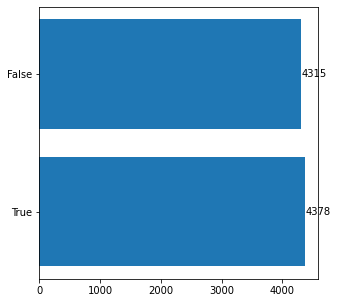

In [6]:
transported_count = df_train['Transported'].value_counts()
fig, ax = plt.subplots(figsize=(5,5))
bars = ax.barh(transported_count.index.astype(str), transported_count.tolist())

ax.bar_label(bars)

In [7]:
df_train.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


In [8]:
fig = px.imshow(df_train.corr(), text_auto=True)
fig.show()

In [9]:
del df_train['Name'] 
del df_train['PassengerId'] 
del df_train['Cabin']
del df_test['Name'] 
del df_test['PassengerId'] 
del df_test['Cabin']

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


##  HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

In [11]:
df = px.data.tips()
fig = px.histogram(df_train, x="HomePlanet")
fig.show()

In [12]:
fig = px.histogram(df_test, x="HomePlanet")
fig.show()

## CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

In [13]:
fig = px.histogram(df_train, x="CryoSleep")
fig.show()

In [14]:
fig = px.histogram(df_test, x="CryoSleep")
fig.show()

## Destination - The planet the passenger will be debarking to.

In [15]:
fig = px.histogram(df_train, x="Destination")
fig.show()

In [16]:
fig = px.histogram(df_test, x="Destination")
fig.show()

## VIP - Whether the passenger has paid for special VIP service during the voyage.

In [17]:
fig = px.histogram(df_train, x="VIP")
fig.show()

In [18]:
fig = px.histogram(df_test, x="VIP")
fig.show()

## Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


In [19]:
fig = px.histogram(df_train, x="Transported")
fig.show()

# processing

In [20]:
def ProcessNum(df):
    num_data = df.select_dtypes(['float64']) 
    num_col = list(num_data.columns)
    dict_num = {i:num_col[i] for i in range(len(num_col)) }
    num_data.head()
    imputer = SimpleImputer(strategy='mean')
    d=imputer.fit_transform(num_data)
    temp=pd.DataFrame(d)
    temp = temp.rename(columns=dict_num) 
    return temp

def ProcessObj(df):
    obj_data = df.select_dtypes(['object']) 
    obj_col = list(obj_data.columns)
    for col in list(obj_data.columns):
        obj_data[col] = obj_data[col].fillna(obj_data[col].mode()[0])
        pass
    z = obj_data.columns
    for i in z:
        un = obj_data[i].unique()
        ran = range(1,len(un)+1)
        obj_data.replace(dict(zip(un,ran)) ,inplace=True)
    obj_data = pd.get_dummies(obj_data, columns=['HomePlanet', 'Destination'], prefix = ['HomePlanet', 'Destination'])
    return obj_data

def ProcessBool(df):
    
    bool_data = df.select_dtypes(['bool'])
    col = bool_data.columns
    for i in col:
        bool_data[i] = LabelEncoder().fit_transform(bool_data[i])
    return bool_data
    

test_num = ProcessNum(df_test)
train_num = ProcessNum(df_train)
test_cat = ProcessObj(df_test)
train_cat = ProcessObj(df_train)
train_bool = ProcessBool(df_train)
train_data_process = pd.concat([train_num,train_cat,train_bool],axis=1)
test_data_process = pd.concat([test_num,test_cat],axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5244: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [21]:
train_data_process.sample(2)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,HomePlanet_1,HomePlanet_2,HomePlanet_3,Destination_1,Destination_2,Destination_3,Transported
8252,15.0,0.0,0.0,0.000000,0.0,0.0,2,1,1,0,0,0,0,1,1
5361,27.0,0.0,0.0,173.729169,0.0,0.0,2,1,1,0,0,0,0,1,1


In [22]:
train_data_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            8693 non-null   float64
 1   RoomService    8693 non-null   float64
 2   FoodCourt      8693 non-null   float64
 3   ShoppingMall   8693 non-null   float64
 4   Spa            8693 non-null   float64
 5   VRDeck         8693 non-null   float64
 6   CryoSleep      8693 non-null   int64  
 7   VIP            8693 non-null   int64  
 8   HomePlanet_1   8693 non-null   uint8  
 9   HomePlanet_2   8693 non-null   uint8  
 10  HomePlanet_3   8693 non-null   uint8  
 11  Destination_1  8693 non-null   uint8  
 12  Destination_2  8693 non-null   uint8  
 13  Destination_3  8693 non-null   uint8  
 14  Transported    8693 non-null   int64  
dtypes: float64(6), int64(3), uint8(6)
memory usage: 662.3 KB


In [23]:
train_data_process.isna().sum()

Age              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
CryoSleep        0
VIP              0
HomePlanet_1     0
HomePlanet_2     0
HomePlanet_3     0
Destination_1    0
Destination_2    0
Destination_3    0
Transported      0
dtype: int64

In [24]:
test_data_process.sample(2)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep,VIP,HomePlanet_1,HomePlanet_2,HomePlanet_3,Destination_1,Destination_2,Destination_3
2655,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0,0,1,0,1,0
1743,48.0,0.0,0.0,0.0,0.0,0.0,2,1,1,0,0,0,1,0


In [25]:
test_data_process.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            4277 non-null   float64
 1   RoomService    4277 non-null   float64
 2   FoodCourt      4277 non-null   float64
 3   ShoppingMall   4277 non-null   float64
 4   Spa            4277 non-null   float64
 5   VRDeck         4277 non-null   float64
 6   CryoSleep      4277 non-null   int64  
 7   VIP            4277 non-null   int64  
 8   HomePlanet_1   4277 non-null   uint8  
 9   HomePlanet_2   4277 non-null   uint8  
 10  HomePlanet_3   4277 non-null   uint8  
 11  Destination_1  4277 non-null   uint8  
 12  Destination_2  4277 non-null   uint8  
 13  Destination_3  4277 non-null   uint8  
dtypes: float64(6), int64(2), uint8(6)
memory usage: 292.5 KB


In [26]:
test_data_process.isna().sum()

Age              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
CryoSleep        0
VIP              0
HomePlanet_1     0
HomePlanet_2     0
HomePlanet_3     0
Destination_1    0
Destination_2    0
Destination_3    0
dtype: int64

# Splitting data

In [27]:
features = np.array(train_data_process.drop('Transported', axis=1))
targets = np.array(train_data_process['Transported'])

In [28]:
x_train, x_val, y_train, y_val = train_test_split(features, targets, test_size=0.2, random_state=0)

# Select Model

In [29]:
rf = RandomForestClassifier()
RF_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [4, 6, 8, 10, 12]}
grid = GridSearchCV(rf, RF_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search = grid.fit(x_train, y_train)
accuracy = grid_search.best_score_ *100
print(accuracy)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
79.4654345489126


In [30]:
rf = RandomForestClassifier(max_depth = 10, n_estimators = 200)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_val)
print("Accuracy: "+str(accuracy_score(y_val,y_pred))) 

Accuracy: 0.7860839562967222


In [31]:
submission = pd.read_csv('../input/spaceship-titanic/sample_submission.csv')
features_test = np.array(test_data_process)
y_test_pred = rf.predict(features_test)

In [32]:
submission['Transported'] = y_test_pred.astype(bool)
submission.to_csv('./submission.csv', index=False)